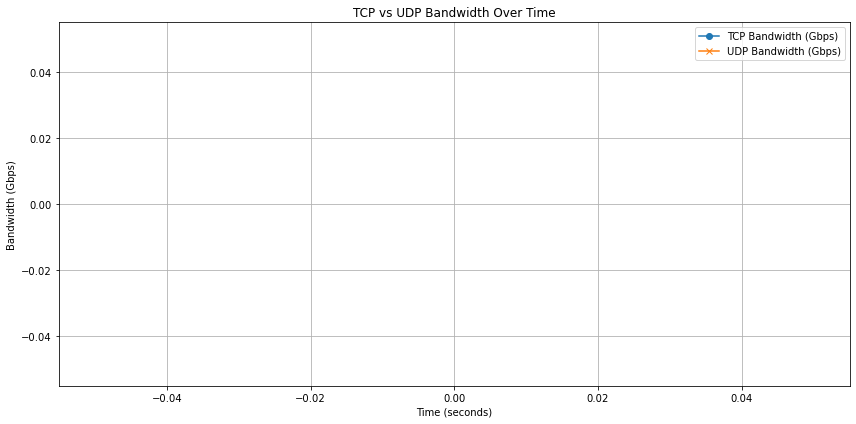

'bandwidth_comparison.png'

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the TCP and UDP test results
tcp_results_path = 'tcp_test_mesh1.txt'
udp_results_path = 'udp_test_mesh1.txt'

# We'll define a function to parse the iperf output files
def parse_iperf(filepath):
    with open(filepath, 'r') as file:
        lines = file.readlines()

    # Initialize empty list to store time and bandwidth pairs
    time_bandwidth = []

    # Process lines
    for line in lines:
        # Skip lines that don't start with a bracket since we want to ignore the headers and summaries
        if not line.startswith('['):
            continue

        # Split the line into words
        parts = line.split()

        # Extract time and bandwidth (assuming that the format is consistent and correct)
        # For TCP, the bandwidth is the 7th word on interval lines
        # For UDP, the bandwidth is the 6th word on interval lines
        try:
            # Extract time interval (e.g., "0.0-2.0" becomes "1" for the midpoint of the interval)
            interval = parts[3]
            start, end = interval.split('-')
            midpoint = (float(start) + float(end)) / 2
            bandwidth = float(parts[6])  # Assuming the 7th word is the bandwidth for TCP, convert to Gbps
            time_bandwidth.append((midpoint, bandwidth))
        except (ValueError, IndexError):
            # If parsing fails, skip the line
            continue

    # Create a DataFrame from the parsed data
    return pd.DataFrame(time_bandwidth, columns=['Time', 'Bandwidth'])

# Parse the result files
tcp_df = parse_iperf(tcp_results_path)
udp_df = parse_iperf(udp_results_path)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(tcp_df['Time'], tcp_df['Bandwidth'], label='TCP Bandwidth (Gbps)', marker='o')
plt.plot(udp_df['Time'], udp_df['Bandwidth'], label='UDP Bandwidth (Gbps)', marker='x')

# Add titles and labels
plt.title('TCP vs UDP Bandwidth Over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Bandwidth (Gbps)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save the plot as a PNG file
output_file = 'bandwidth_comparison.png'
plt.savefig(output_file)

# Show the plot
plt.show()

# Return the path to the saved plot file
output_file
